<a href="https://colab.research.google.com/github/Nagendrareddy777/Deeplearning_Tasks/blob/main/Integer_Encoding_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad',
    "nagendra",
        "nagendra",
        "reddy",
        "@",
        "&*)"]

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(oov_token="<none>")

In [17]:
tokenizer.fit_on_texts(docs)

In [18]:
tokenizer.word_index

{'<none>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'nagendra': 10,
 'go': 11,
 'hurray': 12,
 'bhai': 13,
 'bharat': 14,
 'mata': 15,
 'modi': 16,
 'ji': 17,
 'inquilab': 18,
 'zindabad': 19,
 'reddy': 20}

In [19]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1),
             ('nagendra', 2),
             ('reddy', 1)])

In [20]:
tokenizer.document_count

15

In [23]:
sequences=tokenizer.texts_to_sequences(docs)

In [24]:
sequences

[[11, 2],
 [2, 2],
 [4, 4, 12],
 [3, 13, 3, 2, 3],
 [14, 15, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [16, 17, 5, 6],
 [18, 19],
 [10],
 [10],
 [20],
 [],
 []]

In [25]:
from keras.utils import pad_sequences

sequences=pad_sequences(sequences,padding="post")

In [26]:
sequences

array([[11,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 12,  0,  0],
       [ 3, 13,  3,  2,  3],
       [14, 15,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [16, 17,  5,  6,  0],
       [18, 19,  0,  0,  0],
       [10,  0,  0,  0,  0],
       [10,  0,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int32)

##Buiding an Model

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten
from keras.datasets import imdb

In [29]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
X_train.shape

(25000,)

In [31]:
X_test.shape

(25000,)

In [35]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [36]:
len(X_train[0])

218

In [37]:
len(X_train[2])



141

In [38]:
len(X_train[4])

147

In [41]:
X_train=pad_sequences(X_train,padding="post",maxlen=50)
X_test=pad_sequences(X_test,padding="post",maxlen=50)

In [42]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [43]:
len(X_train[0])

50

In [44]:
len(X_train[7])

50

##Model architecture

In [46]:
model=Sequential()

model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation="sigmoid"))

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

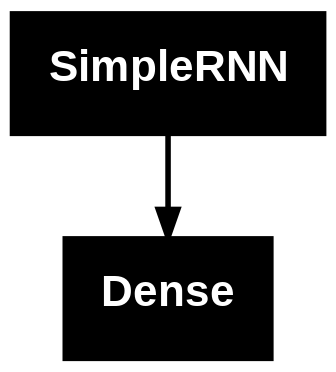

In [48]:
from keras.utils import plot_model
plot_model(model)

In [49]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [50]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5052 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5111 - loss: 0.6931 - val_accuracy: 0.5019 - val_loss: 0.6937
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5056 - loss: 0.6930 - val_accuracy: 0.5025 - val_loss: 0.6945
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5095 - loss: 0.6927 - val_accuracy: 0.5052 - val_loss: 0.6937
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5070 - loss: 0.6929 - val_accuracy: 0.5034 - val_loss: 0.6938
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5076 - loss: 0.6928 - val_accuracy: 0.5013 - val_loss: 0.6945
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.5073 - loss: 0.6926 - val_accuracy: 0.5021 - val_loss: 0.6942
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5040 - loss: 0.6931 - v

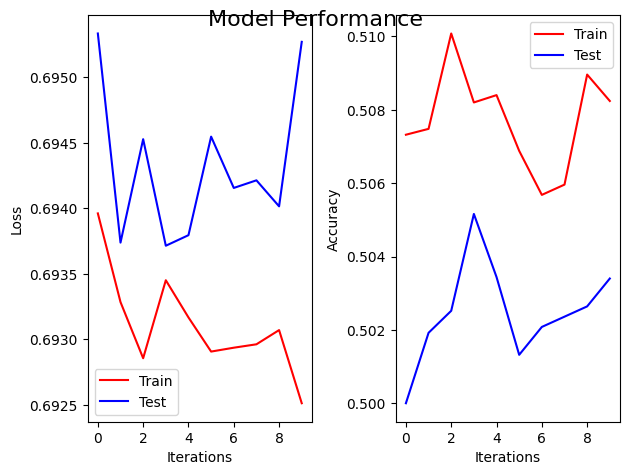

In [65]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(history.history["loss"],color="red",label="Train")
plt.plot(history.history["val_loss"],color="blue",label="Test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],color="red",label="Train")
plt.plot(history.history["val_accuracy"],color="blue",label="Test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.tight_layout()

plt.suptitle("Model Performance",fontsize=16)
plt.show()
